## TIME WINDOW 적용한 LSTM 모델


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler() 
from sklearn import datasets, ensemble, model_selection
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd
from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner import BayesianOptimization



In [2]:

df = pd.read_csv(r"D:\yPy\SY\sy_16to19_W2_obs.csv")
df2 = pd.read_csv(r"D:\yPy\SY\sy_20_W2_obs.csv")
print(list(df.columns))
print(df.head)

['date', 'month', 'inflow', 'AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)', 'depth0', 'depth1', 'depth2', 'depth3', 'depth4', 'depth5', 'depth6', 'depth7', 'depth8', 'depth9', 'depth10', 'depth11', 'depth12', 'depth13', 'depth14', 'depth15', 'depth16', 'depth17', 'depth18', 'depth19', 'depth20', 'depth21', 'depth22', 'depth23', 'depth24', 'depth25', 'depth26', 'depth27', 'depth28', 'depth29', 'depth30', 'depth31', 'depth32', 'depth33', 'depth34', 'depth35', 'depth36', 'depth37', 'depth38', 'depth39', 'depth40', 'depth41', 'depth42', 'depth43', 'depth44', 'depth45', 'depth46', 'depth47', 'depth48', 'depth49', 'depth50', 'depth51', 'depth52', 'depth53', 'depth54', 'depth55', 'depth56', 'depth57', 'depth58', 'depth59', '

In [3]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
data=(df-df.min())/(df.max()-df.min())

df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
data2=(df2-df.min())/(df.max()-df.min())


In [4]:

## R_15
#X1 = data[['inflow', 'AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']]


In [5]:
##R_13
X_depth0=['inflow', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth2=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth4=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth6=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)' ]
X_depth8=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth10=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth12=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth14=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth16=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth18=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth20=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth22=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth24=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth26=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth28=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth30=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth32=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth34=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth36=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth38=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth40=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth42=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth44=['inflow', 'AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth46=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth48=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth50=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth52=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth54=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth56=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth58=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth60=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']

X1=data[X_depth58]
Z1 = data2[X_depth58]


In [6]:
'''
## R_11
X_depth0=['maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth2=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth4=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth6=['AirTemp(°C)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth8=['AirTemp(°C)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth10=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth12=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth14=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth16=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth18=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth20=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth22=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth24=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth26=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth28=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Small-Scale Evaporation(mm)']
X_depth30=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Small-Scale Evaporation(mm)']
X_depth32=['AirTemp(°C)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth34=['AirTemp(°C)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth36=['AirTemp(°C)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth38=['AirTemp(°C)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth40=['AirTemp(°C)', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth42=['AirTemp(°C)', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth44=['AirTemp(°C)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth46=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth48=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth50=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth52=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth54=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth56=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth58=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth60=['AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']

X1=data[X_depth60]
Z1 = data2[X_depth60]
'''


"\n## R_11\nX_depth0=['maximum instantaneous wind speed', 'maximum wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth2=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth4=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth6=['AirTemp(°C)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressu

In [7]:
'''
##R_8
X_depth0=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth2=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Vapor Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth4=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Vapor Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth6=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth8=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth10=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth12=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth14=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth16=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth18=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth20=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth22=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth24=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth26=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth28=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Small-Scale Evaporation(mm)']
X_depth30=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Small-Scale Evaporation(mm)']
X_depth32=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)']
X_depth34=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth36=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth38=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth40=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth42=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth44=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth46=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth48=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth50=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth52=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth54=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth56=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth58=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth60=['CC_Pre(mm)', 'maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']

X1=data[X_depth60]
Z1 = data2[X_depth60]
'''


"\n##R_8\nX_depth0=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth2=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Vapor Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth4=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Vapor Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth6=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth8=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth10=['C

In [8]:
'''

##R_5
X_depth0=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)']
X_depth2=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth4=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth6=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', ]
X_depth8=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth10=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth12=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth14=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth16=['Vapor Pressure(hPa)', 'DewPoint(°C)',  'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth18=['Vapor Pressure(hPa)', 'DewPoint(°C)',  'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth20=['Vapor Pressure(hPa)', 'DewPoint(°C)',  'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth22=['Vapor Pressure(hPa)', 'DewPoint(°C)',  'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth24=['Vapor Pressure(hPa)', 'DewPoint(°C)',  'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth26=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth28=['maximum instantaneous wind speed', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Small-Scale Evaporation(mm)']
X_depth30=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Small-Scale Evaporation(mm)']
X_depth32=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)']
X_depth34=['AirTemp(°C)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)']
X_depth36=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Ground Temp(°C)']
X_depth38=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Small-Scale Evaporation(mm)']
X_depth40=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Small-Scale Evaporation(mm)']
X_depth42=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Small-Scale Evaporation(mm)']
X_depth44=['Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth46=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth48=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth50=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth52=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth54=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth56=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth58=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']
X_depth60=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']

X1=data[X_depth60]
Z1 = data2[X_depth60]

'''

"\n\n##R_5\nX_depth0=['DewPoint(°C)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)']\nX_depth2=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth4=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth6=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Cloud(1/10)', 'Ground Temp(°C)', ]\nX_depth8=['DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth10=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth12=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth14=['Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']\nX_depth16=['Vapo

In [9]:
'''

##W2
X1=data[['AirTemp(°C)', 'CC_Pre(mm)', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)']]
Z1=data2[['AirTemp(°C)', 'CC_Pre(mm)', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)']]

'''

"\n\n##W2\nX1=data[['AirTemp(°C)', 'CC_Pre(mm)', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)']]\nZ1=data2[['AirTemp(°C)', 'CC_Pre(mm)', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)']]\n\n"

In [10]:
y1 = data['depth60']
#Z1 = data2[['inflow', 'AirTemp(°C)', 'CC_Pre(mm)', 'maximum instantaneous wind speed', 'maximum wind speed', 'WindSpeed(m/s)', 'DewPoint(°C)', 'Relative Humidity(%)', 'Vapor Pressure(hPa)', 'Local Atmospheric Pressure(hPa)', 'Sea Level Pressure(hPa)', 'Solar Radiation(MJ/m2)', 'Cloud(1/10)', 'Ground Temp(°C)', 'Small-Scale Evaporation(mm)']]
Obs = data2['depth60']


In [11]:

X_traindepth60, X_testdepth60, y_traindepth60, y_testdepth60 =train_test_split(X1, y1, random_state=0, test_size=0.3, shuffle=False)
X_traindepth60 = X_traindepth60.values 
X_testdepth60= X_testdepth60.values 
y_traindepth60 = y_traindepth60.values 
y_testdepth60 = y_testdepth60.values 
X_traindepth60 = X_traindepth60.reshape(X_traindepth60.shape[0], X_traindepth60.shape[1], 1) 
X_testdepth60 = X_testdepth60.reshape(X_testdepth60.shape[0], X_traindepth60.shape[1], 1)

Z1=Z1.values
Z1 = Z1.reshape(Z1.shape[0], Z1.shape[1], 1)
Obs=Obs.values
Obs = Obs.reshape(Obs.shape[0], 1, 1)



In [12]:
#tuner 이용한 auto ML 환경구축
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from keras_tuner import RandomSearch, Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping 
import gc
from tensorflow.keras.backend import clear_session

def clear_memory():
    clear_session()
    gc.collect()

def build_lstm_model(hp):
    lr = hp.Choice('learning_rate', [0.01, 0.001, 0.0005, 0.0001])
    DROPOUT_RATE = hp.Choice('dropout_rate', [0.0, 0.1, 0.2, 0.3, 0.4])
    N_LAYERS = hp.Int('num_layers', min_value=1, max_value=10, step=1)

    

    model = Sequential()
    model.add(LSTM(20, input_shape=(X_traindepth60.shape[1], X_traindepth60.shape[2])))

    for _ in range(N_LAYERS):
        model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='tanh'))
        model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr), metrics=['mae'])

    return model


tuner = Hyperband(
    build_lstm_model,
    objective='val_mae',
    max_epochs=50,  # 최대 시도 횟수 설정
    overwrite=True,
    directory='./keras-tuner-trial2/depth60',
    project_name='tuner_trial2/depth60'
)

def clear_cache():
    tf.keras.backend.clear_session()

# 각 트라이얼 후
clear_cache()

early_stopping = EarlyStopping(monitor='val_mae', patience=20, restore_best_weights=True)


In [13]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0005, 0.0001], 'ordered': True}
dropout_rate (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.1, 0.2, 0.3, 0.4], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}


In [14]:
tuner.search(X_traindepth60, y_traindepth60, epochs=1000, validation_split=0.2, callbacks=[early_stopping])
tuner.results_summary()

Trial 90 Complete [00h 00m 07s]
val_mae: 0.09027990698814392

Best val_mae So Far: 0.07955864071846008
Total elapsed time: 00h 07m 34s
Results summary
Results in ./keras-tuner-trial2/depth60\tuner_trial2/depth60
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 0072 summary
Hyperparameters:
learning_rate: 0.01
dropout_rate: 0.4
num_layers: 5
units: 96
tuner/epochs: 50
tuner/initial_epoch: 17
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0067
Score: 0.07955864071846008

Trial 0080 summary
Hyperparameters:
learning_rate: 0.001
dropout_rate: 0.4
num_layers: 3
units: 256
tuner/epochs: 17
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.08293158560991287

Trial 0078 summary
Hyperparameters:
learning_rate: 0.001
dropout_rate: 0.1
num_layers: 2
units: 448
tuner/epochs: 17
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.08690734207630157

Trial 0065 summary
Hyperparameters:
learning_rate: 0.01
dropout_rate: 0.4
num_layers: 5
units: 96
tun

In [15]:
# 최적의 실험 결과 가져오기
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

# 최적의 하이퍼파라미터 출력
best_trial = tuner.oracle.get_best_trials(1)[0]
best_hps = best_trial.hyperparameters
print("Best Hyperparameters:", best_hps)

# 필요한 값들 추출
best_learning_rate = best_hps.get('learning_rate')
best_dropout_rate = best_hps.get('dropout_rate')
best_num_layers = best_hps.get('num_layers')
best_units = best_hps.get('units')

# 각 하이퍼파라미터 값 출력
print("Best Learning Rate:", best_learning_rate)
print("Best Dropout Rate:", best_dropout_rate)
print("Best Number of Layers:", best_num_layers)
print("Best Number of Units:", best_units)

Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x00000139E5A1F490>
Best Learning Rate: 0.01
Best Dropout Rate: 0.4
Best Number of Layers: 5
Best Number of Units: 96


In [16]:
import IPython.display
from tensorflow.keras.callbacks import Callback

#훈련 중 출력을 지우는 callback
class ClearTrainingOutputCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        IPython.display.clear_output(wait=True)
        
# 최적의 모델 생성
best_model = tuner.hypermodel.build(best_hps)

# EarlyStopping 콜백 정의  min_delta=-0.02 는 val_loss가 0.02이하일 때. 양수일 시 0.02 이상일 때.
#early_stopping = EarlyStopping(monitor='val_loss',  min_delta=-0.025, patience=200, restore_best_weights=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


# 모델 훈련에 EarlyStopping 콜백 추가
best_model.fit(X_traindepth60, y_traindepth60, epochs=50000, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50000
26/26 [==============================] - 2s 17ms/step - loss: 0.2285 - mae: 0.3447 - val_loss: 0.0237 - val_mae: 0.1222
Epoch 2/50000
26/26 [==============================] - 0s 5ms/step - loss: 0.0652 - mae: 0.2069 - val_loss: 0.0269 - val_mae: 0.1252
Epoch 3/50000
26/26 [==============================] - 0s 5ms/step - loss: 0.0629 - mae: 0.2071 - val_loss: 0.0287 - val_mae: 0.1274
Epoch 4/50000
26/26 [==============================] - 0s 5ms/step - loss: 0.0557 - mae: 0.1943 - val_loss: 0.0207 - val_mae: 0.1259
Epoch 5/50000
26/26 [==============================] - 0s 5ms/step - loss: 0.0606 - mae: 0.2022 - val_loss: 0.0327 - val_mae: 0.1361
Epoch 6/50000
26/26 [==============================] - 0s 4ms/step - loss: 0.0522 - mae: 0.1888 - val_loss: 0.0323 - val_mae: 0.1349
Epoch 7/50000
26/26 [==============================] - 0s 4ms/step - loss: 0.0508 - mae: 0.1867 - val_loss: 0.0247 - val_mae: 0.1170
Epoch 8/50000
26/26 [==============================] - 0s 5ms/step -

In [17]:
# 모델로부터 예측값 얻기
y_preddepth60 = best_model.predict(X_testdepth60)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# 회귀 지표 계산
Test_mse = mean_squared_error(y_testdepth60, y_preddepth60)
Test_mae = mean_absolute_error(y_testdepth60, y_preddepth60)

print("평균 제곱 오차 (MSE):", Test_mse)
print("평균 절대 오차 (MAE):", Test_mae)


# RMSE 계산
Test_rmse = np.sqrt(mean_squared_error(y_testdepth60, y_preddepth60))

# RMSE 출력
print(f'Root Mean Squared Error (RMSE): {Test_rmse}')

from sklearn.metrics import r2_score

# 예측 값과 실제 값 간의 R² 계산
Test_r2 = r2_score(y_testdepth60, y_preddepth60)

# R² 출력
print(f'R-squared (R²): {Test_r2}')

14/14 [==============================] - 0s 2ms/step
평균 제곱 오차 (MSE): 0.029603770670571836
평균 절대 오차 (MAE): 0.15034081926645734
Root Mean Squared Error (RMSE): 0.1720574632806489
R-squared (R²): -0.6856491393878075


In [18]:
# 변환된 데이터로 예측 수행
predic = best_model.predict(Z1)

12/12 [==============================] - 0s 1ms/step


In [19]:
Predic = predic * (df['depth60'].max() - df['depth60'].min()) + df['depth60'].min()

print(Predic)

[[5.028888 ]
 [5.03812  ]
 [5.042026 ]
 [5.0502634]
 [5.0237308]
 [5.039888 ]
 [5.028645 ]
 [4.9967513]
 [5.0205536]
 [5.0542   ]
 [5.036335 ]
 [5.0089846]
 [5.0203223]
 [5.0392175]
 [5.04331  ]
 [5.0105767]
 [5.034051 ]
 [5.0237827]
 [5.032131 ]
 [5.010652 ]
 [5.027054 ]
 [5.0133634]
 [5.0085826]
 [5.012438 ]
 [5.0346117]
 [4.9769335]
 [4.9504557]
 [4.971511 ]
 [4.993826 ]
 [4.9730363]
 [4.9979057]
 [5.0264874]
 [5.003809 ]
 [4.9851365]
 [5.0164704]
 [5.0177264]
 [5.026693 ]
 [4.998596 ]
 [5.0229425]
 [4.9996386]
 [5.0195827]
 [4.9892473]
 [5.015462 ]
 [4.985622 ]
 [5.016246 ]
 [5.0063066]
 [4.9865665]
 [4.987174 ]
 [5.0183706]
 [5.0167093]
 [5.0215354]
 [5.0047307]
 [4.9890585]
 [4.9907303]
 [4.9891963]
 [5.0099034]
 [4.986046 ]
 [4.9930882]
 [5.0233307]
 [4.994269 ]
 [4.990557 ]
 [4.9759254]
 [4.977539 ]
 [4.9594965]
 [4.9795265]
 [4.982181 ]
 [5.000176 ]
 [4.9494967]
 [4.9589214]
 [4.9781256]
 [4.956102 ]
 [4.9489717]
 [4.9093385]
 [4.941093 ]
 [4.943008 ]
 [4.942033 ]
 [5.0049577]

In [20]:
Obs=Obs*(df['depth60'].max() - df['depth60'].min()) + df['depth60'].min()

Text(0, 0.5, 'Predicted price Index: $\\hat{Y}_i$')

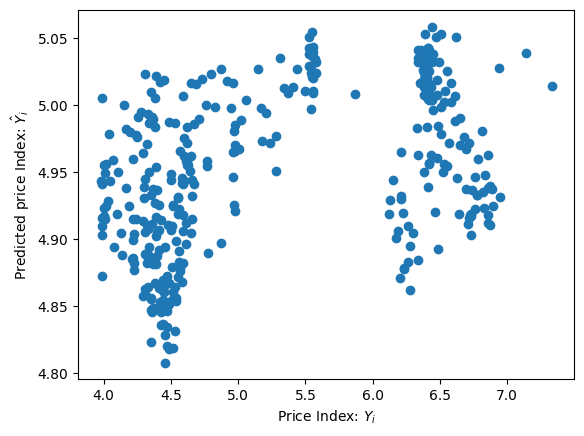

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt   

plt.scatter(Obs, Predic) 
plt.xlabel("Price Index: $Y_i$") 
plt.ylabel("Predicted price Index: $\hat{Y}_i$") 


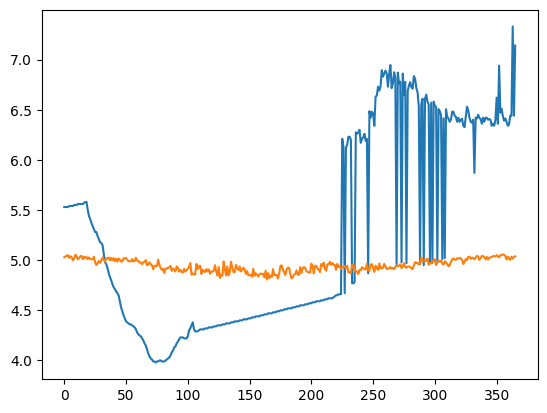

In [22]:
plt.plot(Obs.flatten())
plt.plot(Predic.flatten())

In [23]:
# 회귀 지표 계산
Pmse = mean_squared_error(Obs.flatten(), Predic.flatten())
Pmae = mean_absolute_error(Obs.flatten(), Predic.flatten())

print("평균 제곱 오차 (MSE):", Pmse)
print("평균 절대 오차 (MAE):", Pmae)


# RMSE 계산
Prmse = np.sqrt(mean_squared_error(Obs.flatten(), Predic.flatten()))

# RMSE 출력
print(f'Root Mean Squared Error (RMSE): {Prmse}')

from sklearn.metrics import r2_score

# 예측 값과 실제 값 간의 R² 계산
Pr2 = r2_score(Obs.flatten(), Predic.flatten())

# R² 출력
print(f'R-squared (R²): {Pr2}')

평균 제곱 오차 (MSE): 1.0086264429532468
평균 절대 오차 (MAE): 0.839471514428206
Root Mean Squared Error (RMSE): 1.004303959443179
R-squared (R²): -0.037859661663830924


In [24]:

# 예측값을 데이터프레임으로 변환
gb = pd.DataFrame(Predic, columns=['Prediction'])

# 최적 하이퍼파라미터와 평가 지표 추가
gb['best_learning_rate'] = best_hps.get('learning_rate')
gb['best_dropout_rate'] = best_hps.get('dropout_rate')
gb['best_num_layers'] = best_hps.get('num_layers')
gb['best_units'] = best_hps.get('units')

# 테스트 및 예측 성능 지표 추가
gb['Test_mse'] = Test_mse
gb['Test_mae'] = Test_mae
gb['Test_rmse'] = Test_rmse
gb['Test_r2'] = Test_r2
gb['Pmse'] = Pmse
gb['Pmae'] = Pmae
gb['Prmse'] = Prmse
gb['Pr2'] = Pr2

gb.to_csv(r'D:\yPy\SY\SY_hyperband_R13_depth60_v5.csv', index=False, mode='w', encoding='utf-8-sig')

## depth 변경시 반드시 (?<!X_)depth60(?=[^\w\[]|\s|$) 사용